# A Habitat Suitability Model for Sorghastrum Nutans (S. Nutans)

Sorghastrum Nutans is a grass native to North America. In the past 50 years, its range has moved northward. 

In this notebook I will (attempt to) create modular, reporducible workfolow for the model that combines multiple data layers related to soil pH, topography, and climate (precipitation and surface air temperature).

![Indian Grass](https://images.squarespace-cdn.com/content/v1/5e21ea25b090d7292f53cdda/1585083175299-4U1PZNQ2CP95XTWKC3P6/Sorghastrum-nutans-Indian-Grass-Buy-Native-Minnesota-Prairie-Grass+%281%29.jpg?format=300w)
*Sorghastrum nutans (S. Nutans)*

This image showcases S. Nutans, a native prairie grass this workflow will focus on. 
Image source: [Squarespace](https://images.squarespace-cdn.com/content/v1/5e21ea25b090d7292f53cdda/1585083175299-4U1PZNQ2CP95XTWKC3P6/Sorghastrum-nutans-Indian-Grass-Buy-Native-Minnesota-Prairie-Grass+%281%29.jpg?format=1500w)


## What is Sorghastrum Nutans?

Sorghastrum nutans, commonly known as Indiangrass, is indeed a warm-season grass native to North America. Here are some additional details about this plant:

1. **Habitat and Range:** S. Nutans is typically found in prairies, meadows, and open woodlands. Its native range extends from Canada to Mexico, covering a large portion of the central and eastern United States. As you mentioned, there have been observations of its range expanding northward in the past 50 years. This northward expansion could be influenced by factors such as climate change, land use changes, or other environmental factors.

2. **Thermal Range:** Like many other plants, Sorghastrum nutans has a thermal or temperature range within which it thrives. It is considered a warm-season grass, which means it is most active and grows most vigorously during the warmest months of the year. The thermal range for optimal growth typically corresponds to the temperatures found in late spring, summer, and early fall. While specific temperature preferences can vary among plant species, warm-season grasses, including Sorghastrum nutans, generally prefer temperatures between 75 to 90 degrees Fahrenheit (24 to 32 degrees Celsius) for optimal growth. These temperatures promote processes such as photosynthesis and allow for the efficient utilization of sunlight and water. On the other hand, during colder winter months, warm-season grasses like Sorghastrum nutans tend to go dormant. Freezing temperatures are not conducive to their active growth. The ability of Sorghastrum nutans to go dormant during colder periods is a strategy that helps the plant survive adverse environmental conditions.Understanding the thermal requirements of plants is crucial for predicting their distribution, growth patterns, and responses to changes in climate. As the climate changes, alterations in temperature patterns can influence the distribution and behavior of plant species, including their thermal ranges.

3. **Physical Characteristics:** The grass has distinctive features that make it easily identifiable. It typically grows in clumps and can reach heights of 3 to 7 feet. The leaves are long, narrow, and have a bluish-green tint. In late summer and fall, it produces large, feathery, bronze-colored flower heads that give it a distinct appearance.

4. **Ecological Importance:** Sorghastrum nutans plays a crucial role in the ecosystem. It is a warm-season grass, meaning it is most active during the warmer months of the year. Its deep root system helps prevent soil erosion, and the plant provides habitat and food for various wildlife species.

5. **Cultural and Historical Significance:** Historically, Native American tribes used S. Nutans for various purposes. Some used it for basket weaving, while others utilized it for thatching and construction materials. The seeds of the grass are also a food source for birds and other wildlife.

6. **Conservation and Restoration:** Due to habitat loss and changes in land use, there have been efforts to conserve and restore populations of Sorghastrum nutans. It is often included in prairie restoration projects to promote biodiversity and ecosystem health.

7. **Adaptability:** S. Nutans is known for its adaptability to different soil types and environmental conditions. This adaptability could contribute to its ability to expand its range under changing conditions.

8. **Soil pH:** The preferred soil pH for Sorghastrum nutans can vary, but it often thrives in slightly acidic to neutral soils. A pH range of 4.8 to 8.0 is generally considered suitable pH range.

9. **Precipitation:** Sorghastrum nutans is adapted to a range of precipitation levels. It is often found in areas with moderate to high rainfall, but it can also tolerate drier conditions. While specific precipitation requirements may depend on factors such as soil moisture retention and local climate patterns a general range defined by the USDA is somewhere between 280 mm - 1140 mm (11-45 inches) of annual precipitation. 

10. **Elevation:** Sorghastrum nutans is a versatile grass that can be found at various elevations. It is not strictly limited to specific elevations and can thrive in lowlands as well as uplands. A broad elevation range in which S. Nutans thrives is 0 - 1,500 m above sea level

11. **Slope:** The tolerance of Sorghastrum nutans to different slopes can vary, though it is important to point out that this is a prarie grass and thus would not be found in mountain ranges (with high slopes). S. Nutans  is commonly found in both flat and gently sloping areas. The grass's ability to prevent soil erosion with its deep root system suggests that it can adapt to different slope gradients.

Understanding the dynamics of Sorghastrum nutans and its changing range is important for monitoring the impacts of environmental changes on native plant species and ecosystems.


### Citations:

Anderson, J., & Morse, S. (2012). Topographical Location Has Little Effect on Andropogon gerardii and Sorghastrum nutans. Tillers, 4, 1-3.https://digital-grinnell.nyc3.cdn.digitaloceanspaces.com/ojs-static/tillers/article/view/29/29

Plant database. Lady Bird Johnson Wildflower Center - The University of Texas at Austin. (n.d.). https://www.wildflower.org/plants/result.php?id_plant=sonu2 

Silletti, A., & Knapp, A. (2002). Long-term responses of the grassland co-dominants Andropogon gerardii and Sorghastrum nutans to changes in climate and management. Plant Ecology, 163, 15-22.https://link.springer.com/article/10.1023/A:1020320214750

Sorghastrum Nutans. Sorghastrum nutans (Indiangrass, Yellow Indiangrass) | North Carolina Extension Gardener Plant Toolbox. (n.d.). https://plants.ces.ncsu.edu/plants/sorghastrum-nutans/ 


In [1]:
# Importing packages
import logging 
import os
import zipfile  # Add this line to import the zipfile module
from glob import glob

import earthpy as et
import earthpy.appeears as eaapp
import earthpy.earthexplorer as etee
import earthpy.spatial as es
import geopandas as gpd
import geoviews as gv
import holoviews as hv
import hvplot.pandas
import hvplot.xarray
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import requests
import rioxarray as rxr
import rioxarray.merge as rxrmerge 
import shutil
import xarray as xr
import xrspatial 
from holoviews.element import tiles
from IPython.display import display
from xrspatial import aspect
from xrspatial import slope




# Set up logging so AppeearsDownloader will log in the notebook
logging.basicConfig(level=logging.INFO)

# Set home directory
data_dir = os.path.join(et.io.HOME, et.io.DATA_NAME)
grass_dir = os.path.join(data_dir, 'S_USA.NationalGrasslands')

for a_dir in [grass_dir]:
    if not os.path.exists(a_dir):
        os.makedirs(a_dir)

# Step 1: 
### Let's download US Forest Service Grassland Units Data and select the grasslands we are interested in analyzing 

##### Data Description: 

- Title: US Forest Service National Grassland Units

- Source: US Forest Service

- Description: The dataset contains information about national grassland units managed by the US Forest Service. It includes various attributes that describe the characteristics of each grassland unit.

- Content:
    - GRASSLANDN: Name of the grassland.
    - NATIONALGR: National grassland code or identifier.
    - GIS_ACRES: Area of the grassland in acres.
    - SHAPE_AREA: Area of the grassland in a specific unit.
    - SHAPE_LEN: Length of the grassland shape.
    - geometry: Geometric representation of the grassland(polygons).


##### Dataset Citation:

US Forest Service. (Year). National Grassland Units. [Online]. Available: [https://data.fs.usda.gov/geodata/edw/edw_resources/shp/S_USA.NationalGrassland.zip]. Accessed: December 17, 2023.


Note: The USFS link has been faulty in the past. This link is also located in a Earth-Analytics-2023 GitHub repository. The alternative link to access the USFS National Grasslands Data is pasted below: 

https://github.com/earthlab-education/Earth-Analytics-2023-01-Intro/issues/634#:~:text=USFS%20National%20Grassland%20Units

In [2]:
# create a conditional statement to download shapefile: 
# URL for the USFS National Grassland Units data in shapefile format
grass_path = os.path.join(grass_dir, 'S_USA.NationalGrassland.shp')

if not os.path.exists(grass_path):
    #grass_url = (
    #"https://data.fs.usda.gov/geodata/edw/edw_resources/"
    #"shp/S_USA.NationalGrassland.zip")
    
    grass_url = ("https://github.com/eculler/data-for-bootcamp/releases/"
                 "download/humboldt-park/us_national_grasslands.zip")
    
    gpd.read_file(grass_url).to_file(grass_path)
    
    #read file as a geodataframe (gdf)
    grass_gdf = gpd.read_file(grass_path).set_index('GRASSLANDN')
    
    #Select Fort Pierre and Lyndon B. Johnson as grasslands of interest
    sel_gdf = (
        grass_gdf
        .loc[['Fort Pierre National Grassland', 'Lyndon B. Johnson National Grassland']]  
    )

grass_gdf

,NATIONALGR,GIS_ACRES,SHAPE_AREA,SHAPE_LEN,geometry
GRASSLANDN,,,,,
Sheyenne National Grassland,295509010328,70428.175,0.033356,4.097398,"MULTIPOLYGON (((629578.764 5152608.019, 629979..."
Little Missouri National Grassland,295520010328,1025313.868,0.492746,60.420702,"MULTIPOLYGON (((122332.281 5274931.782, 122732..."
Thunder Basin National Grassland,295513010328,626249.208,0.282888,44.088050,"MULTIPOLYGON (((-23880.098 4816555.439, -23854..."
Oglala National Grassland,295521010328,215804.927,0.096279,1.970612,"POLYGON ((114866.902 4771768.990, 115250.039 4..."
Crooked River National Grassland,295519010328,173593.026,0.079499,2.815873,"POLYGON ((-1240010.469 5193739.513, -1240129.4..."
Caddo National Grassland,295515010328,68479.549,0.026940,1.159342,"MULTIPOLYGON (((791182.518 3744222.312, 791188..."
Pawnee National Grassland,295523010328,208424.885,0.089972,15.341594,"MULTIPOLYGON (((29288.009 4534526.449, 29317.5..."
Comanche National Grassland,295522010328,444413.904,0.183064,26.658022,"MULTIPOLYGON (((57045.586 4183557.592, 57031.6..."
Cimarron National Grassland,295524010328,109101.348,0.044765,5.539623,"MULTIPOLYGON (((234365.238 4112294.904, 234767..."


## This analysis will closely examine S. Nutans in two National Grasslands.

#### <div style="text-align:center">1) Fort Pierre National Grassland</div>

#### <div style="text-align:center">2) Lyndon B. Johnson National Grassland</div>

Analyzing S. nutans in the Fort Pierre National Grassland in South Dakota and the Lyndon B. Johnson National Grassland in Texas, which are geographically distant, offers a comprehensive understanding of S. nutans adaptability to varied climate conditions. This is particularly relevant for a habitat suitability analysis in the context of a changing climate. By examining S. nutans in regions with distinct temperature and precipitation gradients, we might be able to identify thresholds influencing its growth and distribution. 

In [3]:
#create gdf for Fort Pierre National Grassland
pierre_gdf = (grass_gdf.loc[['Fort Pierre National Grassland']])        

# Let's Look at Fort Pierre National Grassland

##### A Brief Description:

Fort Pierre National Grassland is comprised of approximately 116,000 acres of federal land located south of Fort Pierre, South Dakota. The topography ranges from flat to gently rolling hills with large drainages on the north and west boundaries containing relatively steep slopes and creeks that flow toward the Bad River and the Missouri River. 

The Grassland has numerous intermittent drainages that have been dammed to create small to medium-sized ponds that provide water for wildlife and livestock. Many of these ponds have become important for waterfowl habitat.

Fort Pierre National Grassland is widely known for its mixed grass prairie vegetation that provides shelter to many wildlife species. 

**Source:** Nebraska national forests and grasslands - fort pierre national grassland. Forest Service National Website. (n.d.). https://www.fs.usda.gov/recarea/nebraska/recarea/?recid=10637 

![Indian Grass](https://www.travelsouthdakota.com/sites/default/files/listing_images/profile/511/fort-pierre-national-grassland-3309.jpg)
*Fort Pierre National Grassland - South Dakota*
Image source: [Squarespace](https://www.travelsouthdakota.com/sites/default/files/listing_images/profile/511/fort-pierre-national-grassland-3309.jpg)

In [4]:
#create gdf for Lyndon B. Johnson  National Grassland
lyndon_gdf = (grass_gdf.loc[['Lyndon B. Johnson National Grassland']])

# Let's Look at Lyndon B. Johnson National Grassland

##### A Brief Description:

Lyndon B. Johnson (LBJ) National Grassland is comprised of more than 20,250 acres located in the northern part of the U.S. state of Texas (near Fort Worth).This national grassland is characterized by a mix of grasslands (rolling hills, prairies) and woodlands. There is mix of grassy plains, scattered trees, and areas of shrubbery.

This national grassland is also considered part of the Great Plains and is mainly used by the general public for recreation such as hiking, camping, horseback riding, fishing, and hunting. In addition, this national grassland is also used by local farmers as grazing land for cattle and other livestock.


**Source:** U.S. Forest Service. Districts. Texas A&M Forest Service. Retrieved from https://www.fs.usda.gov/detail/texas/about-forest/districts/?cid=fswdev3_008440

![Indian Grass](https://deims.org/sites/default/files/styles/full_size/public/2020-06/48788168896_0f424588ff_b.jpg?itok=evA-GtY6)
*Lyndon B. Johnson National Grassland - Texas*
Image source: [Squarespace](https://deims.org/sites/default/files/styles/full_size/public/2020-06/48788168896_0f424588ff_b.jpg?itok=evA-GtY6)

In [5]:
(gv.tile_sources.OSM * sel_gdf.to_crs(3857).hvplot(
    line_color='black', fill_color=None, line_width=5, 
    xaxis=None, yaxis=None))

:Overlay
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .Polygons.I :Polygons   [x,y]

## Let's check out the coordinates for Fort Pierre National Grassland and Lyndon B. Johnson National Grassland
#### This will help us check that we have downloaded the correct POLARIS files!


In [6]:
#necessary because POLARIS dataset requires IDing coordinate range
pierre = sel_gdf.loc[['Fort Pierre National Grassland']]
pierre.bounds

,minx,miny,maxx,maxy
GRASSLANDN,,,,
Fort Pierre National Grassland,381906.060262,4.870063e+06,414786.415804,4.904086e+06


In [7]:
lyndon = sel_gdf.loc[['Lyndon B. Johnson National Grassland']]
lyndon.bounds

,minx,miny,maxx,maxy
GRASSLANDN,,,,
Lyndon B. Johnson National Grassland,611985.473362,3.676627e+06,642463.406649,3.700517e+06


### Let's translate minx, miny, maxx & maxy to minimum latitude , maximum latitude, minimum longitude & maximum longitude for Fort Pierre and Lyndon B. Johnson National Grasslands!

In [8]:
# Function to extract and display bounding box coordinates
def display_bounding_box(gdf, name):
    minx, miny, maxx, maxy = gdf.total_bounds
    print(f"{name} - Min Latitude: {miny}, Max Latitude: {maxy}")
    print(f"{name} - Min Longitude: {minx}, Max Longitude: {maxx}")
    print()

# Display bounding box for 'Fort Pierre National Grassland'
display_bounding_box(pierre_gdf, 'Fort Pierre National Grassland')

# Display bounding box for 'Lyndon B. Johnson National Grassland'
display_bounding_box(lyndon_gdf, 'Lyndon B. Johnson National Grassland')

Fort Pierre National Grassland - Min Latitude: 4870063.423955036, Max Latitude: 4904085.942033508
Fort Pierre National Grassland - Min Longitude: 381906.06026215, Max Longitude: 414786.4158043482

Lyndon B. Johnson National Grassland - Min Latitude: 3676627.2267368264, Max Latitude: 3700517.326995845
Lyndon B. Johnson National Grassland - Min Longitude: 611985.473362437, Max Longitude: 642463.4066492002



# Now let's take a closer look at our grasslands of interest using Satellite Imagery, OpenStreetMap and a Flat Color base maps. 

In [9]:
grasslands_gdfs = [pierre_gdf, lyndon_gdf]
grassland_names = ['Fort Pierre National Grassland', 'Lyndon B. Johnson National Grassland']

# Define Esri World Imagery tile source
esri_imagery = gv.tile_sources.EsriImagery

for gdf, name in zip(grasslands_gdfs, grassland_names):
    # Tile plots
    osm_plot = gv.tile_sources.OSM * gdf.to_crs(3857).hvplot(
        line_color='black', fill_color=None, line_width=5, title=name,
        xaxis=None, yaxis=None)

    esri_imagery_plot = esri_imagery * gdf.to_crs(3857).hvplot(
        line_color='black', fill_color=None, line_width=5, title=name,
        xaxis=None, yaxis=None)

    # GeoDataFrame plots
    gdf_plot = gdf.hvplot(x='longitude', y='latitude', title=name)

    print(f"Displaying plots for {name}")
    display(osm_plot)
    display(esri_imagery_plot)
    display(gdf_plot)


Displaying plots for Fort Pierre National Grassland


:Overlay
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .Polygons.I :Polygons   [x,y]

:Overlay
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .Polygons.I :Polygons   [x,y]

:Polygons   [longitude,latitude]

Displaying plots for Lyndon B. Johnson National Grassland


:Overlay
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .Polygons.I :Polygons   [x,y]

:Overlay
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .Polygons.I :Polygons   [x,y]

:Polygons   [longitude,latitude]

# STEP 2: Now let's download Probabilistic Remapping of Soil Attributes at High Resolution (POLARIS) Data

### Data Description: 
POLARIS is a comprehensive, high-resolution soil mapping database which provides a spatially continuous, internally consistent, and quantitative prediction of soil series probabilities. 


- Database Name: POLARIS (Probabilistic Remapping of Soil Attributes at High Resolution)
- Spatial Resolution: 30 meters
- Coverage: Contiguous United States (CONUS)
- Data Construction Method: Constructed using high-resolution geospatial environmental data and the DSMART-HPC (Probabilistic Digital    Soil Mapping with High-Performance Computing) machine learning algorithm.
- Objectives: Aimed at providing a high-resolution, probabilistic representation of soil properties.





### Data Citation:
Chaney, N. (2016). POLARIS: A 30-meter probabilistic soil series map of the contiguous United States. Retrieved from http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/

##### DOI: 
https://doi.org/10.1016/j.geoderma.2016.03.025

<img src="https://www.researchgate.net/publication/330896751/figure/fig4/AS:11431281177883196@1690636941451/POLARIS-soil-properties-was-assembled-by-merging-the-pPOLARIS-data-set-with-the-20-000.png" alt="POLARIS Soil Properties" width="500"/>

**POLARIS soil properties.** The image illustrates the assembly of the POLARIS data set. [Source](https://www.researchgate.net/publication/330896751)


## POLARIS Data Variable Options to Select:

##### Variable Options: 
- Silt - silt percentage
- sand - sand percentage
- clay - clay percentage
- bd - bulk density, g/cm3
- theta_s - saturated soil water content, m3/m3
- theta_r - residual soil water content, m3/m3
- ksat - saturated hydraulic conductivity, log10(cm/hr)
- ph - soil pH in H2O, N/A
- om - organic matter, log10(%)
- lambda - pore size distribution index (brooks-corey)
- hb - bubbling pressure (brooks-corey), log10(kPa)
- n - measure of the pore size distribution (van genuchten)
- alpha - scale parameter inversely proportional to mean pore diameter (van genuchten), log10(kPa-1)

##### Depth from surface
- 0-5 cm
- 5-15 cm
- 15-30 cm
- 30-60 cm
- 60-100 cm
- 100-200 cm

##### Statistics provided per layer and variable:
- mean: Arithmetic mean
- mode: Mode
- p50: Median
- p5: 5th percentile
- p95: 95th percentile


## Explanation of my Variable, Depth and Statistic Selections: 
- Variable: pH
- Depth from surface: 60-100 cm
- Statistic: Mean 

#### Reasoning for these choices: 
##### **pH:**
pH is a crucial factor in plant growth and soil health. It directly influences nutrient availability, microbial activity, and chemical processes in the soil. Many plants, including Sorghastrum nutans, have specific pH preferences. In addition, soil pH is particularly relevant in the context of a warming climate. Changes in temperature and precipitation patterns may affect the pH of the soil, potentially influencing the distribution and health of plant species. By focusing on pH, you are targeting a key environmental variable that can significantly impact the habitat suitability of the grass.


##### **Depth from Surface 60-100 cm:** 
Selecting a depth range of 60-100 cm is  based on the consideration of root depth and soil buffering capacity. This range allows one to examine the conditions at a depth where the plant roots are active. In addition, deeper soil layers often have a higher buffering capacity, meaning they can resist changes in pH more effectively. This is important because it provides a stable environment and can provide insights into the long-term trends in soil characteristics. 


##### **Mean:**
Calculating the mean pH at the selected depth provides a representative measure of the overall soil condition for Sorghastrum nutans. A mean value offers a summary of the central tendency of the pH distribution within the specified depth range. This can be valuable in assessing the average conditions that the plant is likely to experience. It provides a balanced view that considers the variability in pH, which can be important for understanding the overall suitability of the habitat.

In [10]:
# Sourced soil data from POLARIS dataset created by Duke: http://hydrology.cee.duke.edu/POLARIS
# gridded pH data (tif files)

# Define common part of the URLs
base_url = 'http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0/ph/mean/60_100/'

# Pierre pH URLs
pierre_lon_ranges = [('-101-100', '-100-99'), ('-101-100', '-100-99'), ('-101-100', '-100-99'), ('-100-99', '-99-98')]
pierre_ph_urls = [f'lat4344_lon{lon_range[0]}.tif' for lon_range in pierre_lon_ranges]

# Lyndon pH URL
lyndon_ph_url = 'lat3334_lon-98-97.tif'

# Make the lists
pierre_soil_list = [base_url + ph_url for ph_url in pierre_ph_urls]
lyndon_soil_list = [base_url + lyndon_ph_url]


In [11]:
def load_and_merge_soil_data(name, list_of_urls, directory): 
    """
    Load in and merge downloaded arrays 
    
    Parameters
    ______________
    name : str
        The name used to label the download
    list_of_urls: list
        list of urls
    directory: pathlike
        path for where to save data
    
    Returns
    ______________
    merge_da : xr.DataArray
        DataArray with the merged data 
    """
    print(f'\nName: {name}')
    ph_datasets = []
    
    for url in list_of_urls:
        print(url)
        # download the URL
        response = requests.get(url)
        
        # Check if the download was successful
        if response.status_code == 200:
            # Generate a filename
            filename = os.path.join(directory, os.path.basename(url))
            
            # Writing using a context manager to open and properly close the file
            with open(filename, 'wb') as data_file:
                data_file.write(response.content)
            
            # Open the raster file using rioxarray
            ph_ds = rxr.open_rasterio(filename, masked=True).squeeze()
            print(ph_ds)
            
            # Append the dataset to the list
            ph_datasets.append(ph_ds)
        else:
            print(f"Failed to download {url}. Status code: {response.status_code}")

    # Merge the datasets in the list
    merge_da = rxrmerge.merge_arrays(ph_datasets) 
    
    # Print or visualize the resulting DataArray
    print(merge_da)
    
    return merge_da

# Merge data for Fort Pierre
pierre_merged_da = load_and_merge_soil_data('Pierre', pierre_soil_list, data_dir)

# Merge data for Lyndon B. Johnson
lyndon_merged_da = load_and_merge_soil_data('Lyndon', lyndon_soil_list, data_dir)


Name: Pierre
http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0/ph/mean/60_100/lat4344_lon-101-100.tif
<xarray.DataArray (y: 3600, x: 3600)>
[12960000 values with dtype=float32]
Coordinates:
    band         int64 1
  * x            (x) float64 -101.0 -101.0 -101.0 ... -100.0 -100.0 -100.0
  * y            (y) float64 44.0 44.0 44.0 44.0 44.0 ... 43.0 43.0 43.0 43.0
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0/ph/mean/60_100/lat4344_lon-101-100.tif
<xarray.DataArray (y: 3600, x: 3600)>
[12960000 values with dtype=float32]
Coordinates:
    band         int64 1
  * x            (x) float64 -101.0 -101.0 -101.0 ... -100.0 -100.0 -100.0
  * y            (y) float64 44.0 44.0 44.0 44.0 44.0 ... 43.0 43.0 43.0 43.0
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
http://hydrology.cee.duke.edu/POLARIS/PROPERTIES

In [12]:
# Define a function to clip pH soil data to grassland boundaries
def clip_soil_data(merged_da, grassland_gdf, crs):
    """
    Clip soil data to the specified grassland boundaries
    
    Parameters
    ______________
    merged_da : xr.DataArray
        Merged DataArray containing soil data
    grassland_gdf : geopandas.GeoDataFrame
        GeoDataFrame containing grassland boundaries
    crs : str
        Coordinate Reference System (CRS) for the clipping
    
    Returns
    ______________
    clipped_da : xr.DataArray
        Clipped DataArray based on grassland boundaries
    """
    # Reproject grassland boundaries to the same CRS as the soil data
    grassland_gdf = grassland_gdf.to_crs(crs)
    
    # Clip the soil data to the grassland boundaries
    clipped_da = merged_da.rio.clip_box(*grassland_gdf.total_bounds, crs=crs)
    
    return clipped_da

# Specify the CRS for clipping (use the CRS of the soil data)
crs = pierre_merged_da.rio.crs

# Clip soil data for Fort Pierre
pierre_clipped_ph_da = clip_soil_data(pierre_merged_da, pierre_gdf, crs)

# Clip soil data for Lyndon B. Johnson
lyndon_clipped_ph_da = clip_soil_data(lyndon_merged_da, lyndon_gdf, crs)

In [13]:
# Plot clipped pH data for Fort Pierre
pierre_clipped_ph_da.hvplot.image(rasterize=True, cmap='viridis', width=600, height=400, title='Clipped pH Data - Fort Pierre')

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


:DynamicMap   []
   :Image   [x,y]   (value)

In [14]:
# Plot clipped pH data for Lyndon B. Johnson
lyndon_clipped_ph_da.hvplot.image(rasterize=True, cmap='viridis', width=600, height=400, title='Clipped pH Data - Lyndon B. Johnson')

:DynamicMap   []
   :Image   [x,y]   (value)

# Step 3: Now let's define the suitable pH range for S. Nutans to be (4.8 to 8.0)

In general, soil pH is a measure of the acidity or alkalinity of the soil, and different plant species have specific pH preferences for optimal growth.

Lower Limit (4.8): A pH of 4.8 is slightly acidic. S. Nutans can tolerate mildly acidic conditions. However, extremely acidic soils may limit nutrient availability.

Upper Limit (8.0): A pH of 8.0 is slightly alkaline. Alkaline soils may contain elevated levels of certain minerals, and S. Nutans does not thrive in such conditions.

Considering the specified pH range (4.8 to 8.0), it seems to cover a broad range of pH values, including both slightly acidic and slightly alkaline conditions. Given this information, S. Nutans could potentially tolerate a range of soil pH levels.


<img src="https://cdn.shopify.com/s/files/1/0059/8835/2052/files/Soil_pH_1.png?v=1614177001" alt="pH Scale" width="500"/>**pH Scale.** [Source](https://cdn.shopify.com/s/files/1/0059/8835/2052/files/Soil_pH_1.png?v=1614177001)

#### Citation:
USDA Natural Resources Conservation Service. Plant Materials Program: Conservation Plant Characteristics of Switchgrass (Panicum virgatum L.) - S. Nutans. Retrieved from [https://www.nrcs.usda.gov/plantmaterials/etpmcpg13196.pdf]
 

In [15]:
regions = {
    'Fort Pierre National Grassland': pierre_gdf,
    'Lyndon B. Johnson National Grassland': lyndon_gdf,
}

In [16]:
# Iterate through regions and generate plots
for region_name, region_gdf in regions.items():
    # Get the merged dataset for the current region
    region_merged_da = pierre_merged_da if region_name == 'Fort Pierre National Grassland' else lyndon_merged_da

    # Clip soil data for the current region
    region_clipped_ph_da = clip_soil_data(region_merged_da, region_gdf, crs)

    # Filter suitable pH range (4.8 to 8.0) for S. Nutans
    suitable_ph_range = (region_clipped_ph_da > 4.8) & (region_clipped_ph_da < 8.0)

    # Plot habitat suitability
    display(suitable_ph_range.hvplot(title=f'{region_name} Habitat Suitability based on Soil pH'))

:Image   [x,y]   (value)

:Image   [x,y]   (value)

# Let's look at all the pH data 
### This code pulls all the urls that are relevant, concatenates then and generates plots! (this not clipped directly to Fort Pierre and Lyndon B. Johnson but includes each grassland and a bit of the surrounding regions)

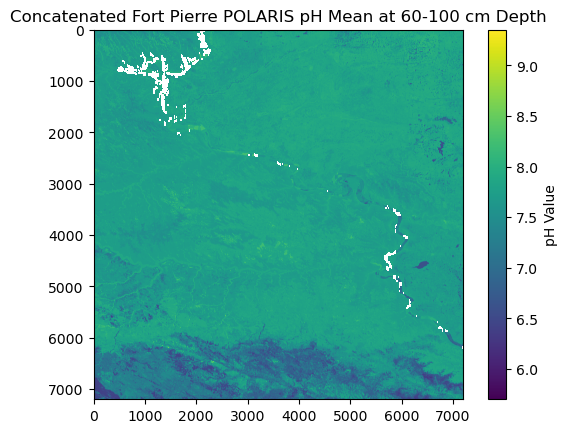

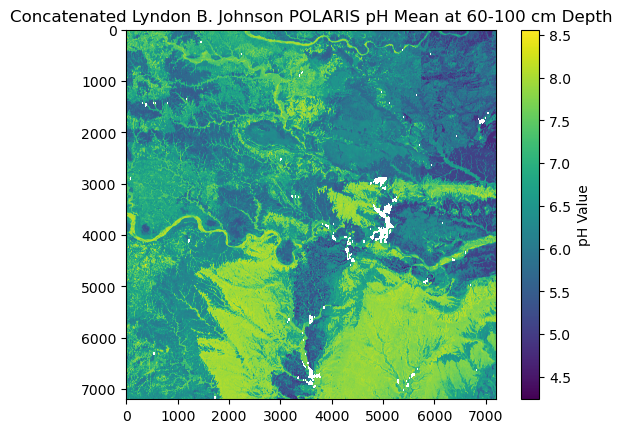

In [17]:
# Define the latitude and longitude ranges for Fort Pierre National Grassland
fort_pierre_min_lat, fort_pierre_max_lat = 43.9, 44.5
fort_pierre_min_lon, fort_pierre_max_lon = -101, -100

# Define the latitude and longitude ranges for Lyndon B. Johnson National Grassland
lbj_min_lat, lbj_max_lat = 33, 34
ljb_min_lon, lbj_max_lon = -98, -97

# Specify the URL template
polaris_url_format = (
    "http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0/ph"
    "/mean/60_100/lat{min_lat}{max_lat}_lon{min_lon}{max_lon}.tif"
)

# Function to fetch and concatenate rioxarray objects for a given region
def fetch_and_concatenate_rasters(min_lat, max_lat, min_lon, max_lon, title):
    raster_list = []

    for lat in range(int(min_lat), int(max_lat) + 1):
        for lon in range(int(min_lon), int(max_lon) + 1):
            polaris_url = polaris_url_format.format(
                min_lat=lat, max_lat=lat + 1, min_lon=lon, max_lon=lon + 1
            )

            raster = rxr.open_rasterio(polaris_url, masked=True).squeeze()
            raster_list.append(raster)

    concatenated_ph_raster = rxr.merge.merge_arrays(raster_list)

    # Plot the concatenated raster
    plt.imshow(concatenated_ph_raster.values, cmap='viridis')
    plt.colorbar(label='pH Value')
    plt.title(f'Concatenated {title} POLARIS pH Mean at 60-100 cm Depth')
    plt.show()

# Fetch and plot for Fort Pierre
fetch_and_concatenate_rasters(
    fort_pierre_min_lat, fort_pierre_max_lat,
    fort_pierre_min_lon, fort_pierre_max_lon,
    'Fort Pierre'
)

# Fetch and plot for Lyndon B. Johnson
fetch_and_concatenate_rasters(
    lbj_min_lat, lbj_max_lat,
    ljb_min_lon, lbj_max_lon,
    'Lyndon B. Johnson'
)


# Step 4: Download Elevation Data from the Shuttle Radar Topography Mission (SRTM) - this is available from the APPEEARS API

- Note: to complete this step you will need a EARTHDATA account (https://urs.earthdata.nasa.gov/home)
- Link to data: (https://doi.org/10.5067/MEaSUREs/SRTM/SRTMGL3_NC.003)


<img src="https://csidotinfo.files.wordpress.com/2018/07/srtm90m_v4p1_25_131.png?w=2000&h=1131&crop=1" alt="Image" width="800"/>

**Caption:** An example of STRM digital elevation data.

[Link to the source](https://csidotinfo.files.wordpress.com/2018/07/srtm90m_v4p1_25_131.png?w=2000&h=1131&crop=1)


## Data Description:
The Shuttle Radar Topography Mission (SRTM) elevation data is a global digital elevation model (DEM) captured by the Space Shuttle Endeavour during an 11-day mission in February 2000. This dataset provides high-quality elevation information for the Earth's land surface, facilitating various applications in earth sciences, environmental monitoring, and geospatial analysis.

**Data Source:**
- Title: SRTMGL3_NC.003
- DOI: https://doi.org/10.5067/MEaSUREs/SRTM/SRTMGL3_NC.003

**Spatial Coverage:**
- Global coverage with a resolution of approximately 3 arc-seconds (about 90 meters).

**Temporal Coverage:**
- Acquisition period: February 2000

**Data Format:**
- NetCDF (Network Common Data Form) format for easy interoperability and storage.

**Key Variables:**
- Elevation: Digital elevation values representing the height of the Earth's surface above mean sea level.

**Data Quality:**
- High-quality elevation data derived from radar interferometry.


### Data Citation:
"Shuttle Radar Topography Mission (SRTM) Elevation Data, Version SRTMGL3_NC.003, acquired by the Space Shuttle Endeavour during an 11-day mission in February 2000. Distributed by NASA MEaSUREs Project. Accessed through the APPEEARS API. https://doi.org/10.5067/MEaSUREs/SRTM/SRTMGL3_NC.003."


In [26]:
def download_srtm(download_key, polygon):
    """
    Download SRTM elevation data
    
    Parameters
    
    download_key: str
        The name used to label the download
    polygon: gpd.GeoDataFrame
        The gdf of grassland
        
    Returns
    
    srtm_data : rioxarray.DataArray
        SRTM elevation data
    """
    
    srtm_downloader = eaapp.AppeearsDownloader(
        download_key=download_key,
        ea_dir=a_dir,
        product='SRTMGL1_NC.003',
        layer='SRTMGL1_DEM',
        start_date='02-11-2000',
        end_date='02-21-2000',
        polygon=polygon
    )
    
    # Download files if the download directory does not exist
    if not os.path.exists(srtm_downloader.data_dir):
        srtm_downloader.download_files()
    
    # Opening the soil data for Pierre and Lyndon
    srtm_paths = glob(
        os.path.join(
            srtm_downloader.data_dir,
            'SRTMGL1_NC*',
            '*.tif')
        )
    srtm_data = [rxr.open_rasterio(srtm_path, masked=True).squeeze() for srtm_path in srtm_paths][0]
    
    return srtm_data

# Download data for Pierre
pierre_srtm_data = download_srtm(
    download_key='Pierre-SRTM',
    polygon=pierre_gdf
)
    
#Download data for Lyndon
lyndon_srtm_data = download_srtm(
    download_key='Lyndon-SRTM',
    polygon=lyndon_gdf
)

INFO:root:Submitting task request...
INFO:root:Logging into AppEEARS API...
INFO:root:Login successful. Auth Header: Bearer 5UGaE8KsU8SmLlLTs8CthExKjF_5wbTihncn2HLAg4JfDuW7du3TVr8swAdbNHFgk9S5jeFW6fGny_k1R_qJ6A


HTTPError: 500 Server Error: INTERNAL SERVER ERROR for url: https://appeears.earthdatacloud.nasa.gov/api/task

In [ ]:
#Plot elevation for both grasslands
pierre_srtm_data.hvplot(colormap='terrain', title='Fort Pierre National Grassland Elevation')
lyndon_srtm_data.hvplot(colormap='terrain', title='Lyndon B. Johnson National Grassland Elevation')

In [ ]:
pierre_srtm_data.hvplot(colormap='terrain', title='Fort Pierre National Grassland Elevation')

# Step 5: Now let's define the suitable elevation range for S. Nutans to be (0-1500 m)
    
In terms of elevation, Sorghastrum nutans is typically found at lower to mid elevations. It is commonly distributed in the central and eastern parts of North America. The elevation range for Sorghastrum nutans is generally between 0 and 1,500 meters above sea level.

#### Citation:
Anderson, J., & Morse, S. (2012). Topographical Location Has Little Effect on Andropogon gerardii and Sorghastrum nutans. Tillers, 4, 1-3.https://digital-grinnell.nyc3.cdn.digitaloceanspaces.com/ojs-static/tillers/article/view/29/29

In [ ]:
# Define a dictionary with region names and corresponding GeoDataFrames
regions = {
    'Fort Pierre National Grassland': pierre_gdf,
    'Lyndon B. Johnson National Grassland': lyndon_gdf,
    # Add more regions if needed
}

# Iterate through regions and generate plots
for region_name, region_gdf in regions.items():
    # Get the SRTM elevation data for the current region
    region_srtm_data = pierre_srtm_data if region_name == 'Fort Pierre National Grassland' else lyndon_srtm_data

    # Filter suitable elevation range (1200 to 1500 meters) for S. Nutans
    suitable_elevation_range = (region_srtm_data > 0) & (region_srtm_data < 1500)

    # Plot elevation suitability
    display(suitable_elevation_range.hvplot(title=f'{region_name} Elevation Suitability for S. Nutans'))


# Step 6: Let's calculate Slope and Aspect (topographically-derived variables) from the APPEEARS SRTM Elevation Data

In [ ]:
# now need to calculate aspect of elevation (SRTM) data
pierre_aspect = xrspatial.aspect(pierre_srtm_data).hvplot(colormap='colorwheel', title='Aspect of Fort Pierre National Grassland')
lyndon_aspect = xrspatial.aspect(lyndon_srtm_data).hvplot(colormap='colorwheel', title='Aspect of Lyndon B. Johnson National Grassland')

# and slope for both grasslands (need to reproject) 
pierre_slope = xrspatial.slope(pierre_srtm_data.rio.reproject(2231)).hvplot(x='x', y='y', colormap='colorwheel', title='Slope of Fort Pierre National Grassland')
lyndon_slope = xrspatial.slope(lyndon_srtm_data.rio.reproject(6468)).hvplot(x='x', y='y', colormap='colorwheel', title='Slope of Lyndon B. Johnson National Grassland')

# make a multiview plot in holoview for each location
(pierre_aspect+pierre_slope).opts(shared_axes=False)
(lyndon_aspect+pierre_slope).opts(shared_axes=False)

# Step 7: Download the MACAV2 MET Climate Data 

**Data Description:**
The MACAv2 dataset provides gridded climate data, and in this analysis, we focused on precipitation for the year 1980. Two Representative Concentration Pathway (RCP) scenarios, RCP 4.5 and RCP 8.5, were chosen to represent different greenhouse gas concentration trajectories. The data is spatially distributed across a defined grid and can be used to study regional climate patterns and changes.

- Climate Variable: Precipitation
- Year: 1980
- RCP Scenarios: RCP 4.5, RCP 8.5


**Data Citation:** MACAv2-METDATA Climate Data. MACA - Multivariate Adaptive Constructed Analogs. https://climate.northwestknowledge.net/MACA/data_catalogs.php

In [ ]:
# Direct download monthly MACAV1MetData Aggregation
# Selected link for 1950-2005 CONUS monthly climate data - precipitation

historic_climate_url = ("http://thredds.northwestknowledge.net:8080/thredds/ncss"
                        "/agg_macav2metdata_pr_CCSM4_r6i1p1_historical_1950_2005_CONUS_monthly.nc"
                        "?var=precipitation"
                        "&disableLLSubset=on"
                        "&disableProjSubset=on"
                        "&horizStride=1"
                        "&time_start=1980-01-15T00%3A00%3A00Z"
                        "&time_end=1980-12-15T00%3A00%3A00Z"
                        "&timeStride=1"
                        "&accept=netcdf"
)

# Download historical climate data
maca_response = requests.get(historic_climate_url)
# maca = os.path.join(data_dir, 'maca.nc')
with open('maca.nc', 'wb') as maca_file:
    maca_file.write(maca_response.content)

# Projected 2006-2099 data under RCP 4.5
projected_rcp45_url = ("http://thredds.northwestknowledge.net:8080/thredds/ncss"
                       "/agg_macav2metdata_pr_CCSM4_"
                       "r6i1p1_rcp45_2006_2099_CONUS_monly.nc?"
                       "var=precipitation"
                       "&disableLLSubset=on"
                       "&disableProjSubset=on"
                       "&horizStride=1"
                       "&time_start=2080-01-15T00%3A00%3A00Z"
                       "&time_end=2080-12-15T00%3A00%3A00Z"
                       "&timeStride=1"
                       "&accept=netcdf"
)

# Download RCP 4.5 data
#maca_response_45 = requests.get(projected_rcp45_url)
# maca_45 = os.path.join(data_dir, 'maca45.nc')
#with open('maca_45.nc', 'wb') as maca_file:
    #maca_file.write(maca_response_45.content)

# Projected 2006-2099 data under RCP 8.5
projected_rcp85_url = ("http://thredds.northwestknowledge.net:8080/thredds/ncss"
                       "/agg_macav2metdata_pr_CCSM4_"
                       "r6i1p1_rcp85_2006_2099_CONUS_monly.nc?"
                       "var=precipitation"
                       "&disableLLSubset=on"
                       "&disableProjSubset=on"
                       "&horizStride=1"
                       "&time_start=2080-01-15T00%3A00%3A00Z"
                       "&time_end=2080-12-15T00%3A00%3A00Z"
                       "&timeStride=1"
                       "&accept=netcdf"
)

# Download RCP 8.5 data
#maca_response_85 = requests.get(projected_rcp85_url)
# maca_85 = os.path.join(data_dir, 'maca85.nc')
# with open('maca_85.nc', 'wb') as maca_file:
    #maca_file.write(maca_response_85.content)
#Plotting precipitation across the U.S.

In [ ]:
maca_ds = xr.open_dataset('maca.nc')
maca_ds = maca_ds.assign_coords(lon=maca_ds.lon-360)
precip_da = maca_ds.precipitation
precip_da.rio.write_crs("epsg:4326", inplace=True)
precip_da.rio.set_spatial_dims('lon', 'lat', inplace=True)

precip_da.mean('time').hvplot(rasterize=True) * pierre_gdf.hvplot()

In [ ]:
precip_da.sum('time').hvplot(title='Annual Total Precipitation Across the The Fort Pierre National Grassland in 1980 (mm)',rasterize=True) * pierre_gdf.hvplot()


In [ ]:
precip_da.sum('time').hvplot(title='Annual Total Precipitation in Lyndon B. Johnson National Grassland in 1980 (mm)',rasterize=True) * lyndon_gdf.hvplot()


In [ ]:
# Define a dictionary with grassland names and corresponding GeoDataFrames
grasslands = {
    'Fort Pierre National Grassland': pierre_gdf,
    'Lyndon B. Johnson National Grassland': lyndon_gdf,
}

# Iterate through grasslands and create plots
for grassland_name, grassland_gdf in grasslands.items():
    # Reproject the bounding box coordinates to the CRS of the precipitation data
    grassland_gdf = grassland_gdf.to_crs(precip_da.rio.crs)

    # Clipping precipitation data for the current grassland
    grassland_precip_da = precip_da.rio.clip_box(*grassland_gdf.total_bounds).sum('time')
    grassland_precip_da.rio.write_crs('epsg:4326', inplace=True)
    grassland_precip_da.rio.set_spatial_dims('lon', 'lat', inplace=True)

    # Define lyndon_precip_da and pierre_precip_da inside the loop
    locals()[f"{grassland_name.lower()}_precip_da"] = grassland_precip_da
    
    # Create and display the plot for the current grassland
    display(grassland_precip_da.hvplot(title=f'Annual precipitation across {grassland_name} in mm'))


# Step 8: Now let's define the suitable precipitation range for S. Nutans

The precipitation suitability range for Sorghastrum nutans is defined as to be 280 mm - 1140 mm (11-45 inches) of **annual** precipitation (USDA, NRCS 2017). 

**Citation:**

USDA Natural Resources Conservation Service.(2017). Plant Materials Program: Conservation Plant Characteristics of Switchgrass (Panicum virgatum L.) - S. Nutans. Retrieved from [https://www.nrcs.usda.gov/plantmaterials/etpmcpg13196.pdf]

In [ ]:
# first lets Reproject the bounding box to EPSG:4326
lyndon_gdf = lyndon_gdf.to_crs(epsg=4326)

# Check the reprojected bounding box
print("Reprojected Lyndon B. Johnson Grassland Bounding Box:", lyndon_gdf.total_bounds)

# Clip precipitation data using the reprojected bounding box
lyndon_precip_da = precip_da.rio.clip_box(*lyndon_gdf.total_bounds).sum('time')
lyndon_precip_da.rio.write_crs('epsg:4326', inplace=True)
lyndon_precip_da.rio.set_spatial_dims('lon', 'lat', inplace=True)

In [ ]:
# Reproject the bounding box to EPSG:4326 for Fort Pierre National Grassland
pierre_gdf = pierre_gdf.to_crs(epsg=4326)

# Check the reprojected bounding box for Fort Pierre National Grassland
print("Reprojected Fort Pierre National Grassland Bounding Box:", pierre_gdf.total_bounds)

# Clip precipitation data using the reprojected bounding box for Fort Pierre National Grassland
pierre_precip_da = precip_da.rio.clip_box(*pierre_gdf.total_bounds).sum('time')
pierre_precip_da.rio.write_crs('epsg:4326', inplace=True)
pierre_precip_da.rio.set_spatial_dims('lon', 'lat', inplace=True)


In [ ]:
# Define a dictionary with grassland names and corresponding precipitation DataArrays
grassland_precip_data = {
    'Fort Pierre National Grassland': pierre_precip_da,
    'Lyndon B. Johnson National Grassland': lyndon_precip_da,
}

# Define the precipitation suitability range
precip_suitability_range = (270, 1140)

# Iterate through grasslands and create suitability plots
for grassland_name, precip_da in grassland_precip_data.items():
    # Check precipitation suitability within the specified range
    suitability_mask = (precip_da > precip_suitability_range[0]) & (precip_da < precip_suitability_range[1])

    # Create and display the plot for the current grassland
    display(suitability_mask.hvplot(title=f'Precipitation suitability for S. Nutans within {grassland_name}'))


# Step 9: Harmonizing the Data
- Let's make sure that the grids for each of the layers match up using the ds.rio.reproject_match() method from rioxarray.

In [ ]:
# Makes the grid the same for all variables 
# Uses the SRTM data as the template grid becauese it has the highest resolution

regridded_pierre_srtm_da = pierre_srtm_data.rio.reproject_match(pierre_clipped_ph_da)
regridded_pierre_srtm_da

regridded_lyndon_srtm_da = lyndon_srtm_data.rio.reproject_match(lyndon_clipped_ph_da)
regridded_lyndon_srtm_da

# First need to harmonize the data using the rioxarray function reproject march then reproject

regridded_pierre_precip_da = pierre_precip_da.rename(lat='y', lon='x').rio.reproject_match(pierre_clipped_ph_da)
regridded_pierre_precip_da

regridded_lyndon_precip_da = lyndon_precip_da.rename(lat='y', lon='x').rio.reproject_match(lyndon_clipped_ph_da)
regridded_lyndon_precip_da

## Let's Make Sure the  Dimensions for Each Grassland Line Up!

In [ ]:
# Check dimensions of the datasets
print("Pierre pH Data Dimensions:", pierre_clipped_ph_da.shape)
print("Pierre Precipitation Data Dimensions:", regridded_pierre_precip_da.shape)
print("Pierre SRTM Elevation Data Dimensions:", regridded_pierre_srtm_da.shape)

print("\nLyndon pH Data Dimensions:", lyndon_clipped_ph_da.shape)
print("Lyndon Precipitation Data Dimensions:", regridded_lyndon_precip_da.shape)
print("Lyndon SRTM Elevation Data Dimensions:", regridded_lyndon_srtm_da.shape)


# Step 10: The "fuzzy-logic model" (kinda a fuzzy-logic model - really just a logic model) 

Develop a fuzzy-logic model to determine habitat suitability for Sorghastrum nutans.

## How this model works: 
To assess habitat suitability for two different grassland areas, namely Fort Pierre National Grasslands and Lyndon B. Johnson National Grasslands. The suitability is evaluated based on three environmental conditions: pH range, precipitation range, and elevation range. The logic model combines these conditions to determine if a pixel in the raster data represents a suitable habitat for grass.

Let's break down the logic for each environmental condition:

**pH Suitability:**

For Fort Pierre National Grasslands (pierre_ph_suitability): The condition checks if the pH values in the pierre_clipped_ph_da raster fall within the range of 4.8 to 8.0.
For Lyndon B. Johnson National Grasslands (lyndon_ph_suitability): Similar to the Fort Pierre case, it checks if the pH values in the lyndon_clipped_ph_da raster fall within the same pH range.

**Precipitation Suitability:**
For Fort Pierre National Grasslands (pierre_precip_suitability): The condition checks if the precipitation values in the regridded_pierre_precip_da raster are between 270 and 335 mm.
For Lyndon B. Johnson National Grasslands (lyndon_precip_suitability): Similar to the Fort Pierre case, it checks if the precipitation values in the regridded_lyndon_precip_da raster fall within the same range.

**Elevation Suitability:**
For Fort Pierre National Grasslands (pierre_elev_suitability): The condition checks if the elevation values in the pierre_srtm_data raster are between 1200 and 1500 meters.
For Lyndon B. Johnson National Grasslands (lyndon_elev_suitability): Similar to the Fort Pierre case, it checks if the elevation values in the lyndon_srtm_data raster fall within the same range.
Finally, the overall habitat suitability for each grassland is determined by combining these conditions using element-wise multiplication (*). This means that a pixel will be considered suitable only if it meets all three conditions simultaneously (pH, precipitation, and elevation). The result is then visualized using the Holoviews library with the hvplot function, providing a plot of habitat suitability for each grassland area. The title of each plot indicates the corresponding grassland.

In [ ]:
# For each raster will want to determine for each pixel whether or not it's a suitable habitat for the grass 
# 1 means that pixel is suitable for all conditions, 0 means at least one was not.

# S. Nutans is adapted to a pH range of 4.8 to 8.0
pierre_ph_suitability = ((pierre_clipped_ph_da > 4.8) * (pierre_clipped_ph_da < 8))
lyndon_ph_suitability = ((lyndon_clipped_ph_da > 4.8) * (pierre_clipped_ph_da < 8))

# Precipitation suitability is 270 to 355 mm 
pierre_precip_suitability = ((regridded_pierre_precip_da > 270) * (regridded_pierre_precip_da  < 335))
lyndon_precip_suitability = ((regridded_lyndon_precip_da > 270) * (regridded_lyndon_precip_da < 335))

# Approx. elevation range is 1200-1500 m 
pierre_elev_suitability = ((pierre_srtm_data > 1200) * (pierre_srtm_data <1500))
lyndon_elev_suitability = ((lyndon_srtm_data > 1200) * (lyndon_srtm_data <1500))

# Would multiply all conditions together to plot them all together. 
(pierre_ph_suitability * pierre_precip_suitability * pierre_elev_suitability).hvplot(title ='Habitat suitability for Fort Pierre National Grasslands')
(lyndon_ph_suitability * lyndon_precip_suitability * lyndon_elev_suitability).hvplot(title ='Habitat suitability for Lyndon B. Johnson National Grasslands')

In [ ]:
(pierre_ph_suitability * pierre_precip_suitability * pierre_elev_suitability).hvplot(title ='Habitat suitability for Fort Pierre National Grasslands')


## Psudeo Code to finish up

1) Define Up Suitability Conditions:

- pH Suitability: The code checks if the precipitation data (precip_da) is within the pH range of 4.8 to 8.0. The resulting boolean arrays (pierre_ph_suitability and lyndon_ph_suitability) represent whether each pixel meets the pH suitability conditions for Fort Pierre and Lyndon B. Johnson grasslands.

- Precipitation Suitability: The code checks if the precipitation data (precip_da) is within the range of 270 to 355 mm. The resulting boolean array (precip_suitability) represents whether each pixel meets the precipitation suitability conditions.

- Elevation Suitability: The code checks if the elevation data (srtm_data) is within the range of 1200 to 1500 meters. The resulting boolean array (elev_suitability) represents whether each pixel meets the elevation suitability conditions.


2) Iterating Over Grasslands and Climate Scenarios:

- The code then enters a loop where it iterates over grasslands (grassland_gdfs) and climate scenarios (climate_dataarrays).
- For each combination of grassland and climate scenario, it reprojects the bounding box coordinates of the grassland to the CRS of the precipitation data.
- It clips the precipitation data for the current grassland using the bounding box.
- It applies the suitability conditions (clipped pH and elevation) to the clipped precipitation data.
- It combines the suitability variables to calculate the overall habitat suitability (habitat_suitability) for each pixel.
- It then plots the results using Holoviews.

In summary, the code is performing spatial operations to determine the habitat suitability for specific grasslands under different climate scenarios. The suitability conditions are based on pH, precipitation, and elevation criteria, and the results are visualized for each combination of grassland and climate scenario.

# A Rough outline of the Psudo Code 

In [20]:
# pH suitability conditions
pierre_ph_suitability = ((precip_da > 4.8) * (precip_da < 8))
lyndon_ph_suitability = ((precip_da > 4.8) * (precip_da < 8))

# Precipitation suitability conditions (adjust the range)
precip_suitability = ((precip_da > 270) * (precip_da < 355))

# Elevation suitability conditions (adjust the range)
elev_suitability = ((srtm_data > 1200) * (srtm_data < 1500))

# Iterate over grasslands and climate scenarios
for grassland_name, grassland_gdf in zip(grassland_names, grassland_gdfs):
    for climate_scenario, precip_da in zip(climate_scenarios, climate_dataarrays):
        # Reproject the bounding box coordinates to the CRS of the precipitation data
        grassland_gdf = grassland_gdf.to_crs(precip_da.rio.crs)
        
        # Clipping precipitation data for the current grassland
        grassland_precip_da = precip_da.rio.clip_box(*grassland_gdf.total_bounds).sum('time')

        # Apply suitability conditions
        ph_suitability_clipped = ph_suitability.rio.clip_box(*grassland_gdf.total_bounds)
        elevation_suitability_clipped = elevation_suitability.rio.clip_box(*grassland_gdf.total_bounds)

        # Combine suitability variables
        habitat_suitability = grassland_precip_da * ph_suitability_clipped * elevation_suitability_clipped

        # Plotting the results
        (habitat_suitability.mean('time').hvplot(
            title=f'Habitat Suitability {climate_scenario} in {grassland_name}', rasterize=True)
         * grassland_gdf.hvplot()).cols(1)

NameError: name 'srtm_data' is not defined

**NOTE:** I was having a heck of a time trying to get my SRTM data to download (500 Server Error). The last time (12/16) it did download the code ran. That being said, the download hasnt gone through since! 